<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-05-12 09:16:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2021-05-12 09:16:48 (13.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

importlib_metadata-2 | 11 KB     | ##################################### | 100% 
ptyprocess-0.6.0     | 23 KB     | ##################################### | 100% 
lzo-2.10             | 317 KB    | ##################################### | 100% 
ipython-7.18.1       | 1.1 MB    | ##################################### | 100% 
gmp-6.1.2            | 744 KB    | ##################################### | 100% 
sqlite-3.33.0        | 2.0 MB    | ##################################### | 100% 
kiwisolver-1.2.0     | 91 KB     | ##################################### | 100% 
nbconvert-6.0.7      | 530 KB    | ##################################### | 100% 
libprotobuf-3.13.0.1 | 2.3 MB    | ##################################### | 100% 
unixodbc-2.3.9       | 299 KB    | ##################################### | 100% 
google-pasta-0.2.0   | 44 KB     | ##################################### | 100% 
jupyter_client-6.1.7 | 76 KB     |                                       |   0% WARNING conda.gateways.disk.d

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/licenses/COPYING.md.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/test/run_test.bat.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/test/run_test.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/info/test/run_test.sh.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlin

pytables-3.6.1       | 1.5 MB    | ##################################### | 100% 
pyyaml-5.3.1         | 191 KB    | ##################################### | 100% 
libwebp-base-1.1.0   | 869 KB    | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 MB    | ##################################### | 100% 
pyjwt-1.7.1          | 32 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/top_level.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/entry_points.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_

defusedxml-0.6.0     | 23 KB     | ##################################### | 100% 
termcolor-1.1.0      | 7 KB      | ##################################### | 100% 
pytest-6.1.1         | 418 KB    | ##################################### | 100% 
entrypoints-0.3      | 12 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/__pycache__/entrypoints.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/entrypoints-0.3-py3.7.egg-info.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0

mkl_random-1.1.0     | 376 KB    | ##################################### | 100% 
nltk-3.5             | 1.1 MB    | ##################################### | 100% 
toml-0.10.1          | 20 KB     | ##################################### | 100% 
terminado-0.9.1      | 26 KB     | ##################################### | 100% 
libtiff-4.1.0        | 607 KB    | ##################################### | 100% 
ca-certificates-2020 | 128 KB    | ##################################### | 100% 
freetype-2.10.4      | 901 KB    | ##################################### | 100% 
notebook-6.1.4       | 6.3 MB    | ##################################### | 100% 
libuuid-1.0.3        | 16 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libuuid-1.0.3-h1bed415_2/include/uuid/uuid.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:u

pandas-1.1.3         | 10.5 MB   | ##################################### | 100% 
opt_einsum-3.1.0     | 54 KB     | ##################################### | 100% 
html5lib-1.1         | 92 KB     | ##################################### | 100% 
libxcb-1.14          | 610 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xevie.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xkb.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/res.h.  Please remove this file manually (you may need to reboot t

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/render.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xc_misc.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xcb.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/dpms.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140

hdf5-1.10.4          | 5.3 MB    | ##################################### | 100% 
libpq-12.2           | 2.8 MB    | ##################################### | 100% 
numexpr-2.7.1        | 197 KB    | ##################################### | 100% 
tensorflow-estimator | 294 KB    | ##################################### | 100% 
webencodings-0.5.1   | 19 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings-0.5.1-py3.7.egg-info/dependency_links.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings-0.5.1-py3.7.egg-info/top_level.txt.  Please remove this file manually (you may need to reboot to free file handles)
WAR

pickleshare-0.7.5    | 13 KB     | ##################################### | 100% 
json5-0.9.5          | 22 KB     | ##################################### | 100% 
pluggy-0.13.1        | 32 KB     | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
botocore-1.19.1      | 4.2 MB    | ##################################### | 100% 
libffi-3.3           | 54 KB     | ##################################### | 100% 
wrapt-1.12.1         | 50 KB     | ##################################### | 100% 
cycler-0.10.0        | 13 KB     | ##################################### | 100% 
plotly-4.11.0        | 5.9 MB    | ##################################### | 100% 
pyodbc-4.0.30        | 72 KB     | ##################################### | 100% 
sqlalchemy-1.3.19    | 1.8 MB    | ##################################### | 100% 
backcall-0.2.0       | 14 KB     | ##################################### | 100% 
pytz-2020.1          | 239 K

xlrd-1.2.0           | 186 KB    | ##################################### | 100% 
sip-4.19.24          | 297 KB    | ##################################### | 100% 
yarl-1.6.2           | 139 KB    | ##################################### | 100% 
nbclient-0.5.1       | 60 KB     | ##################################### | 100% 
docutils-0.15.2      | 736 KB    | ##################################### | 100% 
pycparser-2.20       | 94 KB     | ##################################### | 100% 
mpmath-1.1.0         | 957 KB    | ##################################### | 100% 
prompt-toolkit-3.0.8 | 244 KB    | ##################################### | 100% 
markdown-3.3.2       | 123 KB    | ##################################### | 100% 
keras-applications-1 | 30 KB     | ##################################### | 100% 
scikit-image-0.17.2  | 10.7 MB   | ##################################### | 100% 
pyqt-5.9.2           | 5.6 MB    | ##################################### | 100% 
click-7.1.2          | 67 KB

networkx-2.5         | 1.2 MB    | ##################################### | 100% 
absl-py-0.10.0       | 169 KB    | ##################################### | 100% 
pyasn1-0.4.8         | 58 KB     | ##################################### | 100% 
ninja-1.10.1         | 1.9 MB    | ##################################### | 100% 
numpy-1.19.1         | 20 KB     | ##################################### | 100% 
libxgboost-0.90      | 3.8 MB    | ##################################### | 100% 
pymssql-2.1.5        | 228 KB    | ##################################### | 100% 
future-0.18.2        | 720 KB    | ##################################### | 100% 
tensorboard-plugin-w | 663 KB    | ##################################### | 100% 
zlib-1.2.11          | 120 KB    | ##################################### | 100% 
ipykernel-5.3.4      | 176 KB    | ##################################### | 100% 
bokeh-2.2.3          | 7.0 MB    | ##################################### | 100% 
mkl_fft-1.2.0        | 164 K

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fcprivate.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fontconfig.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/include/fontconfig/fcfreetype.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/lib/pkgconfig/fontconfig.pc.  Please remove this file manually (you may need to reboot to free file handle

protobuf-3.13.0.1    | 700 KB    | ##################################### | 100% 
blosc-1.19.0         | 81 KB     | ##################################### | 100% 
tk-8.6.10            | 3.2 MB    | ##################################### | 100% 
scikit-learn-0.23.2  | 6.9 MB    | ##################################### | 100% 
intel-openmp-2020.2  | 947 KB    | ##################################### | 100% 
traitlets-5.0.5      | 81 KB     | ##################################### | 100% 
c-ares-1.16.1        | 112 KB    | ##################################### | 100% 
_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
tornado-6.0.4        | 649 KB    | ##################################### | 100% 
yaml-0.2.5           | 87 KB     | ##################################### | 100% 
libgcc-ng-9.1.0      | 8.1 MB    | ##################################### | 100% 
mock-4.0.2           | 31 KB     | ##################################### | 100% 
seaborn-0.11.0       | 216 K

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/P/P8-W.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/8/8510.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse50-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse160-43.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/h/hp110.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/h/hp2648a.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/h/hp2397.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/h/heath-ansi.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xnuppc-b.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xnuppc-m-f2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/xterm+pcf2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/x/x68k.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unli

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/v/vte.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/v/vt510pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/v/vip.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/v/vc303.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att5410v1-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/apple-80.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/ansi-generic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/aaa+rv.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/f/fox.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/f/falco-p.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/f/f110-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/f/f200.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/include/ncurses/curses.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/include/ncurses/eti.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/include/ncurses/term_entry.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/include/ncurses/nc_tparm.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/q/qvt203-25-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/q/qdss.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/q/qvt119p-25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/q/qansi-t.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlin

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bh3m.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bg1.25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/bq300-pc-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/b/beehive3.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm5151.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/iris-color.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm+color.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm6153-90.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:u

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att730r.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att4418-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/appleIIe.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/aj832.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_o

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/sun-e.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/superbeeic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/stv52pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/s/sun-s.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_

cachetools-4.1.1     | 12 KB     | ##################################### | 100% 
pexpect-4.8.0        | 79 KB     | ##################################### | 100% 
testpath-0.4.4       | 88 KB     | ##################################### | 100% 
argon2-cffi-20.1.0   | 49 KB     | ##################################### | 100% 
libsodium-1.0.18     | 387 KB    | ##################################### | 100% 
pandoc-2.11          | 12.5 MB   | ##################################### | 100% 
pillow-8.0.0         | 686 KB    | ##################################### | 100% 
scipy-1.5.2          | 18.5 MB   | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
nbformat-5.0.8       | 101 KB    | ##################################### | 100% 
expat-2.2.10         | 192 KB    | ##################################### | 100% 
readline-8.0         | 428 KB    | ##################################### | 100% 
widgetsnbextension-3 | 1.8 M

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/include/libxml2/libxml/xpointer.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/include/libxml2/libxml/schemasInternals.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/include/libxml2/libxml/xmlunicode.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/include/libxml2/libxml/HTMLtree.h.  Please remove this file manually (you may need to reboot to free 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-parserInternals.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-xmlversion.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/libxml-globals.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/html/html/li

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/lib/python3.7/site-packages/mistune-0.8.4.dist-info/top_level.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/lib/python3.7/site-packages/mistune-0.8.4.dist-info/RECORD.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/lib/python3.7/site-packages/mistune-0.8.4.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/li

blinker-1.4          | 21 KB     | ##################################### | 100% 
brotlipy-0.7.0       | 348 KB    | ##################################### | 100% 
matplotlib-base-3.3. | 6.7 MB    | ##################################### | 100% 
keras-preprocessing- | 36 KB     | ##################################### | 100% 
google-auth-oauthlib | 21 KB     | ##################################### | 100% 
requests-oauthlib-1. | 22 KB     | ##################################### | 100% 
py-xgboost-0.90      | 77 KB     | ##################################### | 100% 
icu-58.2             | 22.7 MB   | ######################9               |  62% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/simpletz.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-5

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/uscript.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/docmain.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/ucharstriebuilder.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/datefmt.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/dtitvinf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/umachine.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/utrace.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/upluralrules.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_r

grpcio-1.31.0        | 2.2 MB    | ##################################### | 100% 
cytoolz-0.11.0       | 367 KB    | ##################################### | 100% 
gast-0.3.3           | 14 KB     | ##################################### | 100% 
freetds-1.00.97      | 2.4 MB    | ##################################### | 100% 
_pytorch_select-0.1  | 2 KB      | ##################################### | 100% 
mkl-2019.4           | 204.1 MB  | ##################################### | 100% 
snowballstemmer-2.0. | 58 KB     | ##################################### | 100% 
ld_impl_linux-64-2.3 | 645 KB    | ##################################### | 100% 
boto3-1.16.0         | 70 KB     | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
bzip2-1.0.8          | 105 KB    | ##################################### | 100% 
gst-plugins-base-1.1 | 6.3 MB    | ##################################### | 100% 
jupyter_core-4.6.3   | 75 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/info/recipe/meta.yaml.template.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/info/about.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/info/run_exports.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/info/has_prefix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename

bleach-3.2.1         | 111 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/bleach-3.2.1-py_0/info/licenses/LICENSE.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/bleach-3.2.1-py_0/info/test/run_test.bat.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/bleach-3.2.1-py_0/info/test/run_test.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/bleach-3.2.1-py_0/info/test/run_test.sh.  Please remove this file manually (you may need to reboot to free file hand

soupsieve-2.0.1      | 33 KB     | ##################################### | 100% 
astunparse-1.6.3     | 17 KB     | ##################################### | 100% 
ipython_genutils-0.2 | 39 KB     | ##################################### | 100% 
jmespath-0.10.0      | 22 KB     | ##################################### | 100% 
pyparsing-2.4.7      | 64 KB     | ##################################### | 100% 
pyopenssl-19.1.0     | 47 KB     | ##################################### | 100% 
libxslt-1.1.34       | 573 KB    | ##################################### | 100% 
jupyterlab-2.2.6     | 5.9 MB    | ##################################### | 100% 
parso-0.7.0          | 71 KB     | ##################################### | 100% 
retrying-1.3.3       | 15 KB     | ##################################### | 100% 
astor-0.8.1          | 45 KB     | ##################################### | 100% 
cryptography-3.1.1   | 625 KB    | ##################################### | 100% 
jupyterlab_server-1. | 24 KB

astropy-4.0.2        | 7.6 MB    | ##################################### | 100% 
joblib-0.17.0        | 205 KB    | ##################################### | 100% 
jeepney-0.4.3        | 22 KB     | ##################################### | 100% 
urllib3-1.25.11      | 93 KB     | ##################################### | 100% 
jpeg-9b              | 247 KB    | ##################################### | 100% 
attrs-20.2.0         | 41 KB     | ##################################### | 100% 
cloudpickle-1.6.0    | 29 KB     | ##################################### | 100% 
numpy-base-1.19.1    | 5.2 MB    | ##################################### | 100% 
krb5-1.17.1          | 1.5 MB    | ##################################### | 100% 
sympy-1.6.2          | 10.5 MB   | ##################################### | 100% 
pytorch-1.5.0        | 33.3 MB   | ##################################### | 100% 
nest-asyncio-1.4.1   | 10 KB     | ##################################### | 100% 
python-dateutil-2.8. | 224 K

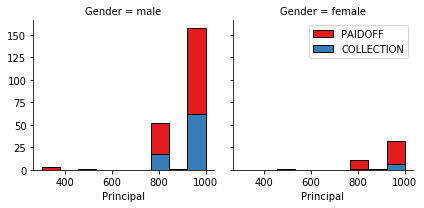

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

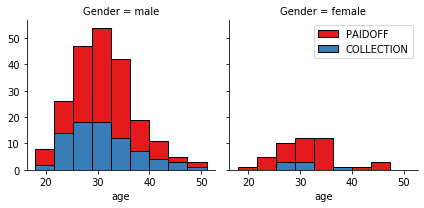

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


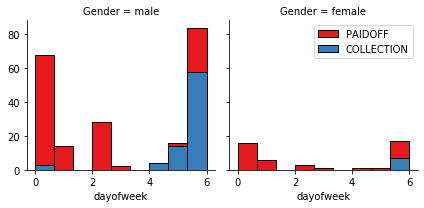

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Import library
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


KNeighborsClassifier(n_neighbors=4)

In [22]:
kyhat = neigh.predict(X_test)
kyhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [23]:
# calculate the accuracy of KNN for different Ks
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    kyhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(kyhat==y_test);
    
    std_acc[n-1]=np.std(kyhat==y_test)/np.sqrt(kyhat.shape[0])
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

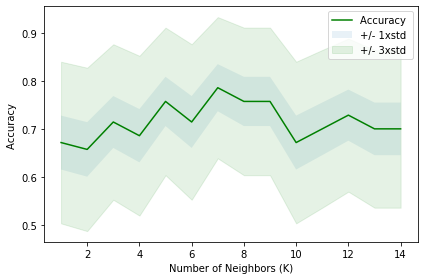

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

In [26]:
# the best k is 7
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


# Decision Tree


In [27]:
pip install matplotlib==3.1.3 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.tree import DecisionTreeClassifier
# recall
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [29]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
Tree = DecisionTreeClassifier(criterion="loan_status", max_depth = 4)
Tree # it shows the default parameters

In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "tree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine


In [54]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [55]:
SVM_yhat = SVM_model.predict(X_test)
SVM_yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Logistic Regression


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [62]:
yhat = LR.predict(X_test)
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [63]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106],
       [0.31680537, 0.68319463],
       [0.48830185, 0.51169815],
       [0.47823073, 0.52176927],
       [0.34259428, 0.65740572],
       [0.4934056 , 0.5065944 ],
       [0.33806706, 0.66193294],
       [0.49662231, 0.50337769],
       [0.24891907, 0.75108093],
       [0.3419095 , 0.6580905 ],
       [0.43751789, 0.56248211],
       [0.25760497, 0.74239503],
       [0.52357188, 0.47642812],
       [0.30450278, 0.69549722],
       [0.50166363, 0.49833637],
       [0.3195971 , 0.6804029 ],
       [0.44276988, 0.55723012],
       [0.49410185, 0.50589815],
       [0.51350333, 0.48649667],
       [0.47203498, 0.52796502],
       [0.40944694, 0.59055306],
       [0.50846442, 0.49153558],
       [0.51098415, 0.48901585],
       [0.37457647, 0.62542353],
       [0.50418423, 0.49581577],
       [0.25299635, 0.74700365],
       [0.

# Model Evaluation using Test set


In [77]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

First, download and load the test set:


In [66]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-05-11 17:16:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-05-11 17:16:53 (58.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [67]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [92]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
Y = test_df['loan_status'].values
Y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [93]:
kyhat = kNN_model.predict(X_test)

print("KNN F1-score: %.2f" % f1_score(y_test, kyhat, average='weighted') )

KNN F1-score: 0.70


In [94]:
DT_yhat = Tree.predict(X_test)

print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [83]:
SVM_yhat = SVM_model.predict(X_test)

print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM F1-score: 0.73


In [82]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR F1-score: 0.67
LR LogLoss: 0.58


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
